In [46]:
import numpy as np
from matplotlib import pyplot as plt
import math

import pandas as pd
from sklearn import preprocessing
import seaborn as sns

KMEANS

In [3]:
def kmeans(X,K,max_iter=1000):
    """
    Perform k-means on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    means : ndarray of shape (K,d)
        the K recovered cluster means given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data
    mean_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    means = X[mean_ind]
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a center in 'means'
        for j in range(X.shape[0]):
            groups[np.argmin(((means-X[j,:])**2).sum(axis=1))].append(j) #d[k] return value of the key k
            
        # calculate new means
        ### your code here
        new_means = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_means[k] = X[groups[k]].mean(axis=0)
            else:
                new_means[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(means,new_means):
            #print("Converged after {} iterations!".format(i))
            return means, groups
        else:
            means = new_means
            groups = {i:[] for i in range(K)}
    #print("Failed to converge after {} iterations...".format(max_iter))

KMEANS++

In [4]:
def kmeansplus(X,K,max_iter=1000):
    """
    Perform k-means++ on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    means : ndarray of shape (K,d)
        the K recovered cluster means given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data, a better way
    #mean_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    #means = X[mean_ind]
    
    mean_ind = []
    mean_ind.append(int(np.random.choice(range(X.shape[0]), 1))) # c1
    #print(X[mean_ind])
    
    for i in range(1,K):
        D2sum = 0
        Pr = []
        for pt in X:
            D2 = np.min(((X[mean_ind]-pt)**2).sum(axis=1))
            D2sum += D2
        for pt in X:
            D2 = np.min(((X[mean_ind]-pt)**2).sum(axis=1))
            Pr.append(D2 / D2sum)
        mean_ind.append(int(np.random.choice(range(X.shape[0]), 1, p=Pr)))
        #print(X[np.array(mean_ind)])
    
    means = X[np.array(mean_ind)]
    #print(means.shape)
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a center in 'means'
        for j in range(X.shape[0]):
            groups[np.argmin(((means-X[j,:])**2).sum(axis=1))].append(j) #d[k] return value of the key k
            
        # calculate new means
        ### your code here
        new_means = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_means[k] = X[groups[k]].mean(axis=0)
            else:
                new_means[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(means,new_means):
            #print("Converged after {} iterations!".format(i))
            return means, groups
        else:
            means = new_means
            groups = {i:[] for i in range(K)}
    #print("Failed to converge after {} iterations...".format(max_iter))

KMEDIANS

In [5]:
def kmedians(X,K,max_iter=1000):
    
    # initialize the means as randomly selected points in the data
    median_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    medians = X[median_ind]
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a group
        for j in range(X.shape[0]):
            groups[np.argmin((np.abs(medians-X[j,:])).sum(axis=1))].append(j)
            
        # calculate new means
        ### your code here
        new_medians = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_medians[k] = np.median(X[groups[k]], axis=0)
            else:
                new_medians[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(medians,new_medians):
            #print("Converged after {} iterations!".format(i))
            return medians, groups
        else:
            medians = new_medians
            groups = {i:[] for i in range(K)}
    print("Failed to converge after {} iterations...".format(max_iter))

ALG3_means

In [6]:
def euclid_dist(x1, x2):
    """
    Euclidean distance between two vectors.
    """
    result = 0.0
    for i in range(x1.shape[0]): #shape[0] is row number
        result += (x1[i] - x2[i]) ** 2
    return np.sqrt(result)

def ALG3_means(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2,2+dim)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = np.sqrt(float(dim)) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if euclid_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmeans(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        means, group = kmeans(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, means))
   
    return Y, revisedY, cluster_pts

ALG3_meansplus

In [7]:
def euclid_dist(x1, x2):
    """
    Euclidean distance between two vectors.
    """
    result = 0.0
    for i in range(x1.shape[0]): #shape[0] is row number
        result += (x1[i] - x2[i]) ** 2
    return np.sqrt(result)

def ALG3_meansplus(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2,2+dim)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = np.sqrt(float(dim)) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if euclid_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmeansplus(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        means, group = kmeansplus(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, means))
   
    return Y, revisedY, cluster_pts

ALG3_medians (distance is Manhattan distance)

In [8]:
def M_dist(x1, x2):
    """
    Manhattan distance between two vectors.
    """
    result = np.linalg.norm(x1 - x2, ord=1)
    return result

def ALG3_medians(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2,2+dim)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = float(dim) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if M_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmedians(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        medians, group = kmedians(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, medians))
   
    return Y, revisedY, cluster_pts

Fairness score computation

alpha

In [9]:
# show the bad coalition
def fairness_score_alpha(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension alpha defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_alpha : float
        There are at most max_alpha * (n/K) agents who want to together deviate to another common location(center)
        Algorithm which computes "centers" doesn't care these <max_alpha * (n/K)> agents adequately
    """
    
    n, dim = X.shape
    K = centers.shape[0]
    max_alpha = 0
    
    # grid search for possible deviating center(location)
    for p in range(pow(n_grid, dim)):
        
        # transform p to a deviating center
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)# d(i,Y)
            
            ratio_list.append(min_dist_to_centers / euclid_dist(loc, pt))
            # For current loop-fixed deviating center loc, X has a ratio_list whose element is d(i,Y)/d(i,y') (y' is unchanged in ratio_list)
        
        index = np.argsort(ratio_list)  
        
        if max(ratio_list) >= 1.0: # There really exists some pt(agent) in X who prefers to deviate to current loop-fixed location(center)
            
            A = 0 # \sum{d(i, Y)}
            B = 0 # \sum{d(i, y')}

            alpha_coalition = []
            for i in range(n):
                pt = X[index[-1-i]]
                
                alpha_coalition.append(pt)
                
                to_center_dist = []
                for c in centers:
                    to_center_dist.append(euclid_dist(c, pt))
                min_dist_to_centers = min(to_center_dist)
                
                A += min_dist_to_centers
                B += euclid_dist(loc, pt) # here loc = y'
                
                # For a real deviating center, when i iterates not much, A/B is large since y' is highly close to pts in X[index[-1-i]]
                if A/B <= 1.0: 
                    # now find a group of agents with size i+1(i starts from 0, i+1 is true number of points) won't divert to loc (i.e., sum_d(i,Y) <= sum_d(i,loc))
                    # i agents will divert to loc together, i+1 agents won't, then (i+1)/(n/K) is this y'(loc)'s alpha
                    if max_alpha < (i+1) * K/ n:
                        #always update max_alpha with current largest alpha
                        max_alpha = (i+1) * K/ n
                        max_alpha_coalition = np.array(alpha_coalition)
                        max_alpha_deviating_center = loc
                        break
                    break
                    
    # max_alpha_coalition: ndarray of points in X with max_alpha
    return max_alpha, max_alpha_coalition, max_alpha_deviating_center

beta

In [10]:
def fairness_score_beta(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension beta defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_beta : float
        All kinds of ceil(n/K) agents have total distance to their closest centers smaller than that to the center they most want to deviate
    """
    
    n, dim = X.shape
    max_beta = 0
    K = centers.shape[0]
    
    # grid search for feasible cluster center location 'loc'
    for p in range(pow(n_grid, dim)):
        
        # transform p to practical possible deviating `location
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist) 
            #for this pt, the distance between it and the center closest to it is min_dist_to_centers
            #in paper, it is d(pt,centers)
            
            ratio_list.append(min_dist_to_centers / euclid_dist(loc, pt))
        
        index = np.argsort(ratio_list)
        #index is ndarray whose elements are indexes of ratio_list and the indexes' corresponding elements in ratio_list are in increasing order
        
        A = 0 # \sum{d(i, Y)}
        B = 0 # \sum{d(i, y')}
        
        beta_coalition = []
        for i in range(math.ceil(n/K)):
            pt = X[index[-1-i]]
            # find ceil(n/K) points whose ratio in ratios list are first ceil(n/K) large ones
            # these points most possibly in X divert to loc in this p loop 
            
            beta_coalition.append(pt)
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)
            #print(min_dist_to_centers / euclid_dist(loc, pt))
            
            A += min_dist_to_centers
            B += euclid_dist(loc, pt)
        
        if A/B > max_beta:
            max_beta = A/B
            max_beta_coalition = np.array(beta_coalition)
            max_beta_deviating_center = loc

    return max_beta, max_beta_coalition, max_beta_deviating_center

alpha for M distance

In [11]:
# show the bad coalition
def fairness_score_alpha_M(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension alpha defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_alpha : float
        There are at most max_alpha * (n/K) agents who want to together deviate to another common location(center)
        Algorithm which computes "centers" doesn't care these <max_alpha * (n/K)> agents adequately
    """
    
    n, dim = X.shape
    K = centers.shape[0]
    max_alpha = 0
    
    # grid search for possible deviating center(location)
    for p in range(pow(n_grid, dim)):
        
        # transform p to a deviating center
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)# d(i,Y)
            
            ratio_list.append(min_dist_to_centers / M_dist(loc, pt))
            # For current loop-fixed deviating center loc, X has a ratio_list whose element is d(i,Y)/d(i,y') (y' is unchanged in ratio_list)
        
        index = np.argsort(ratio_list)  
        
        if max(ratio_list) >= 1.0: # There really exists some pt(agent) in X who prefers to deviate to current loop-fixed location(center)
            
            A = 0 # \sum{d(i, Y)}
            B = 0 # \sum{d(i, y')}

            alpha_coalition = []
            for i in range(n):
                pt = X[index[-1-i]]
                
                alpha_coalition.append(pt)
                
                to_center_dist = []
                for c in centers:
                    to_center_dist.append(M_dist(c, pt))
                min_dist_to_centers = min(to_center_dist)
                
                A += min_dist_to_centers
                B += M_dist(loc, pt) # here loc = y'
                
                # For a real deviating center, when i iterates not much, A/B is large since y' is highly close to pts in X[index[-1-i]]
                if A/B <= 1.0: 
                    # now find a group of agents with size i+1(i starts from 0, i+1 is true number of points) won't divert to loc (i.e., sum_d(i,Y) <= sum_d(i,loc))
                    # i agents will divert to loc together, i+1 agents won't, then (i+1)/(n/K) is this y'(loc)'s alpha
                    if max_alpha < (i+1) * K/ n:
                        #always update max_alpha with current largest alpha
                        max_alpha = (i+1) * K/ n
                        max_alpha_coalition = np.array(alpha_coalition)
                        max_alpha_deviating_center = loc
                        break
                    break
                    
    # max_alpha_coalition: ndarray of points in X with max_alpha
    return max_alpha, max_alpha_coalition, max_alpha_deviating_center

beta for M distance

In [12]:
def fairness_score_beta_M(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension beta defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_beta : float
        All kinds of ceil(n/K) agents have total distance to their closest centers smaller than that to the center they most want to deviate
    """
    
    n, dim = X.shape
    max_beta = 0
    K = centers.shape[0]
    
    # grid search for feasible cluster center location 'loc'
    for p in range(pow(n_grid, dim)):
        
        # transform p to practical possible deviating `location
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist) 
            #for this pt, the distance between it and the center closest to it is min_dist_to_centers
            #in paper, it is d(pt,centers)
            
            ratio_list.append(min_dist_to_centers / M_dist(loc, pt))
        
        index = np.argsort(ratio_list)
        #index is ndarray whose elements are indexes of ratio_list and the indexes' corresponding elements in ratio_list are in increasing order
        
        A = 0 # \sum{d(i, Y)}
        B = 0 # \sum{d(i, y')}
        
        beta_coalition = []
        for i in range(math.ceil(n/K)):
            pt = X[index[-1-i]]
            # find ceil(n/K) points whose ratio in ratios list are first ceil(n/K) large ones
            # these points most possibly in X divert to loc in this p loop 
            
            beta_coalition.append(pt)
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)
            #print(min_dist_to_centers / euclid_dist(loc, pt))
            
            A += min_dist_to_centers
            B += M_dist(loc, pt)
        
        if A/B > max_beta:
            max_beta = A/B
            max_beta_coalition = np.array(beta_coalition)
            max_beta_deviating_center = loc

    return max_beta, max_beta_coalition, max_beta_deviating_center

totaldist(objective) computation

In [13]:
def totaldist(X, centers, ismeans):
    '''
    Compute total distance for kmeans or kmedians
    
    X: dataset
    centers: ndarray of shape (K, dim)
    ismeans: True when centers are related to kmeans; False when median
    
    '''

    totaldist = 0
    
    if ismeans:
        for pt in X:
            totaldist += np.min(((centers-pt)**2).sum(axis=1))
    else:
        for pt in X:
            totaldist += np.min(np.abs(centers-pt).sum(axis=1))
    
    return totaldist

Visualization

ALG3_augmented_nofix(Y, revisedY, cluster_pts)

In [54]:
def ALG3_augmented_nofix(Y, revisedY, cluster_pts):
    
    #Y, revisedY, cluster_pts = ALG3(gaussian1, 10, 20, 1/200)

    color = ['c','y','palegreen','plum','tan',
             'yellow','paleturquoise','pink','cornflowerblue','mistyrose',
             'olive','salmon','lightskyblue','darkgrey','lime',
            'lightcoral','tomato','chocolate','olivedrab','cadetblue']

    for i in range(len(cluster_pts)):
        plt.scatter(cluster_pts[i][:,0], cluster_pts[i][:,1], s = 0.5, c=color[i])

    plt.scatter(Y[:, 0], Y[:, 1], s=80, marker='*', c='r')# s is size
    plt.scatter(revisedY[:, 0], revisedY[:, 1], s=100, marker='x', c='b')# s is size

max_alpha_coalition(max_alpha_coalition, max_alpha_deviating_center):

In [15]:
def max_alpha_coalition(max_alpha_coalition, max_alpha_deviating_center):
    plt.scatter(max_alpha_coalition[:, 0], max_alpha_coalition[:, 1], s=20, marker='*')
    plt.scatter(max_alpha_deviating_center[0], max_alpha_deviating_center[1], s=100, marker='*', c='r')

max_beta_coalition(max_beta_coalition, max_beta_deviating_center)

In [16]:
def max_beta_coalition(max_beta_coalition, max_beta_deviating_center):
    plt.scatter(max_beta_coalition[:, 0], max_beta_coalition[:, 1], s=20, marker='*')
    plt.scatter(max_beta_deviating_center[0], max_beta_deviating_center[1], s=100, marker='*', c='r')

view_meansormedians(X, centers, groups) #different from ALG3_? is because the specialty of their return

In [52]:
def view_meansormedians(X, centers, groups):
    # find each cluster in kmeans_fix_several_centers
    cluster = []
    for value in groups.values():
        each_cluster = np.zeros(2)
        for i in value:
            each_cluster = np.vstack((each_cluster, X[i]))
        each_cluster = np.delete(each_cluster, 0, axis=0)
        cluster.append(each_cluster)

    #use different colors to draw each cluster that k-means derives
    color = ['c','y','palegreen','plum','tan',
             'yellow','paleturquoise','pink','cornflowerblue','mistyrose',
             'olive','salmon','lightskyblue','darkgrey','lime',
            'lightcoral','tomato','chocolate','olivedrab','cadetblue']# only afford less than 20 clusters!!!
    for i in range(len(cluster)):
        plt.scatter(cluster[i][:,0], cluster[i][:,1], s = 0.5, c=color[i])
    plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='x', c='b')# s is size

IMPORT dataset

(6014, 2)


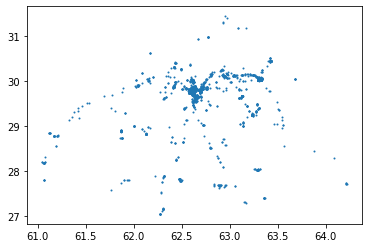

In [25]:
J_loc = pd.read_csv('/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/Joensuu.csv', header=None)

J_loc = np.array(J_loc)
print(J_loc.shape)

# min_max_scaler = preprocessing.MinMaxScaler()
# gaussian_data = min_max_scaler.fit_transform(J_loc)
# print(gaussian_data)
plt.scatter(J_loc[:,0], J_loc[:,1],s=1)

(6014, 2)
[[0.48948434 0.61514509]
 [0.48948434 0.61514509]
 [0.48948434 0.61514509]
 ...
 [0.49596789 0.60651257]
 [0.49612565 0.60367686]
 [0.49612249 0.60369737]]


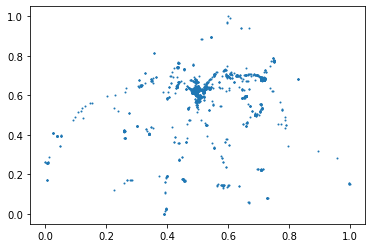

In [22]:
J_loc = pd.read_csv('/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/Joensuu.csv', header=None)

J_loc = np.array(J_loc)
print(J_loc.shape)

min_max_scaler = preprocessing.MinMaxScaler()
gaussian_data = min_max_scaler.fit_transform(J_loc)
print(gaussian_data)
plt.scatter(gaussian_data[:,0], gaussian_data[:,1],s=1)

RUN Algorithms

Accuracy=20

KMEANSPLUS

In [27]:
for K in range(2,10,2):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/kmeansplus_loc K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/ALG3_meansplus_loc K={}".format(K))
    plt.clf()
    

1.9650814765547058 2.1929116674466598 65.52322447199899
1.0741602926504823 1.0055518057581259 65.23872503928833
0.7529098769537745 0.848697791978793 19.307813323061882
0.7529098769537745 0.8486977919787705 19.307813323061886
1.018623212504157 1.0104557847245257 14.339205104729885
1.0954439640838045 1.082176540918538 16.82299778445314
1.5191220485533754 1.6714829421853312 11.560170012144273
1.117392750249418 1.0822173837970683 12.049235240422101


<Figure size 432x288 with 0 Axes>

In [28]:
for K in range(10,20,2):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/kmeansplus_loc K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/ALG3_meansplus_loc K={}".format(K))
    plt.clf()
    

1.709344861988693 1.772433363410911 7.739025624268301
1.3535084802128368 1.4107466823836112 10.330132918607736
1.6581310276022614 1.489024298294833 6.5503121653987835
0.6145660126371799 0.9346248198870747 7.911327527269681
2.4349850349185234 2.122094179330634 5.871177499291434
1.818091120718324 1.5341593556193525 6.603190495655462
2.22148320585301 1.4336019340460766 4.907007567923419
2.1203857665447288 1.59367054238534 5.8680822506219394
1.5174592617226472 1.0809635243117444 3.748789820672313
2.582973062853342 1.6319781128252537 5.682337076306657


<Figure size 432x288 with 0 Axes>

In [30]:
for K in range(7,19,2):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/kmeansplus_loc K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/ALG3_meansplus_loc K={}".format(K))
    plt.clf()
    

1.3257399401396741 1.2450027613948935 12.592478341624659
1.1825739940139675 1.2091268513279156 11.859679625641288
1.5488859328234121 1.476209144569702 8.321166115588907
1.4890256069171932 1.3708449475033737 11.463990411295306
1.8656468240771533 1.9453161549450781 6.1985422903400265
1.4504489524442967 1.473238680427286 8.47173009698408
2.20269371466578 2.038986052406588 5.557329910290479
1.6925507149983372 1.5183348213078292 7.667544101761518
2.3021283671433324 2.1288687117937246 4.3451514710967025
2.002826737612238 1.5595208906478322 7.906807505155221
2.987861656135683 2.187812486202369 4.2549404200141865
1.8373794479547723 1.4199399863986313 6.112667243962976


<Figure size 432x288 with 0 Axes>

In [31]:
for K in range(7,21):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/kmeansplus_loc2 K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/ALG3_meansplus_loc2 K={}".format(K))
    plt.clf()
    

1.1651147322913202 1.1732500930114877 12.549084821744723
1.3501829065513802 1.246052324696558 12.544077863408456
1.4512803458596608 1.4932490842920865 11.215429645371277
1.4965081476554705 1.565255828199953 13.341653618068777
1.2884935151313601 1.0667694123026041 9.539607110527879
1.2435982707016962 1.2106368027386445 11.298144821481364
1.697705354173595 1.7223974541710227 6.832602504514694
1.4782174925174592 1.3731302233121707 10.618440300465604
2.1253741270369138 2.243330069056036 8.045395917325585
1.4358164283338877 1.4689722917023165 10.062937888187792
1.7758563352178252 1.5019898477461324 5.929899265030934
1.5204522780179581 1.6795175233525308 7.533753751996192
1.839541070834719 1.3269040183665683 6.005598795076282
1.7336215497173262 1.5081654546233487 8.937945219253606
2.4163618224143666 2.075534634850901 5.8167955734452015
1.848353841037579 1.5274543704297292 8.472138012461802
2.643831060857998 2.114732768643435 4.438008644231366
2.0128034585966077 1.5684770149844047 6.665565699

<Figure size 432x288 with 0 Axes>

In [32]:
for i in range(10):
    for K in range(8,21):
        meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
        max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
        max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
        totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
        print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
#         view_meansormedians(gaussian_data, meansplus, groups_meansplus)
#         plt.title("kmeansplus K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/kmeansplus_loc K={}".format(K))
#         plt.clf()# renew to prevent overlap


        Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
        max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
        max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
        totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
        print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
#         ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
#         plt.title("ALG3_meansplus K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/JoensuuLocation/ALG3_meansplus_loc K={}".format(K))
#         plt.clf()
    

1.5204522780179581 1.6624879991130102 11.68278289963415
1.4220152976388427 1.467430565007345 12.656188229579113
1.1822414366478218 1.2215230874660918 11.6257642097474
1.2675424010641836 1.1636491283003012 10.776591576142742
1.725972730295976 1.7528522938231381 7.427162451072855
1.4782174925174592 1.3731302233121707 10.618493139645567
1.8400399068839375 1.9031235102310609 6.984649748182105
1.4358164283338877 1.119398244789227 10.251440784968976
2.031260392417692 2.0301644910940717 7.2716662265691046
1.5164615896242102 1.4924584552742948 8.837447215972528
1.9108746258729632 1.5270952216373943 5.2750512092976365
0.6355171267043564 0.9783135673654618 7.19911379105873
1.9973395410708348 1.5744099314432816 4.681146700970804
1.8204190222813434 1.5341593556193525 7.213897829690199
2.0776521449950116 1.600539729159494 5.086779469163743
1.785833056202195 1.8922617208776036 8.531604319162874
2.859993348852677 2.1395721384998203 4.348584532048191
2.1815763219155304 1.8517847844098674 6.73154357535

KeyboardInterrupt: 

Medians Part

(6014, 2)


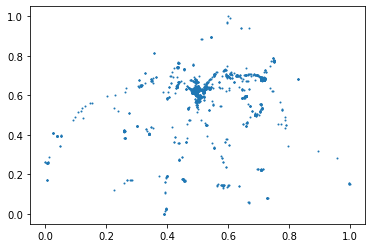

In [34]:
print(gaussian_data.shape)

plt.scatter(gaussian_data[:,0], gaussian_data[:,1],s=1)

In [42]:
K=10
medians, groups_medians = kmedians(gaussian_data, K)
max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
totaldist_medians = totaldist(gaussian_data, medians, False)
print(max_alpha_medians, max_beta_medians, totaldist_medians)
# view_meansormedians(gaussian_data, medians, groups_medians)
# # plt.title("kmedians K={}".format(K))
# plt.xticks([])  #去掉x轴
# plt.yticks([])  #去掉y轴        

0.5869637512470901 0.770156686140402 161.07523213926194


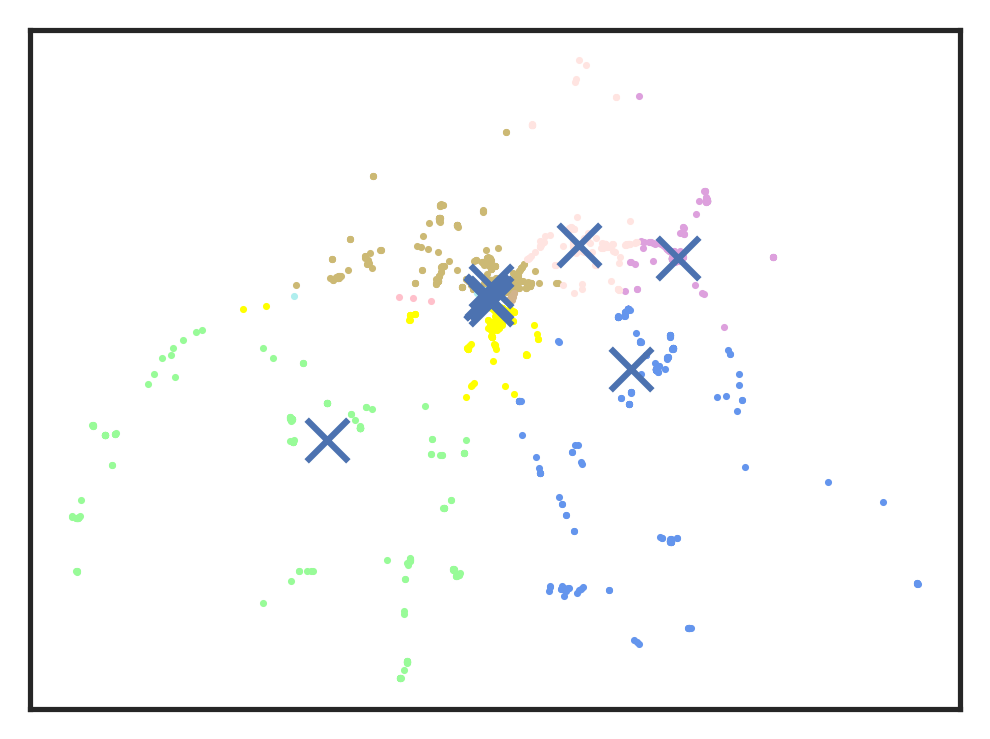

In [60]:
plt.figure(dpi=300,figsize=(4,3))
sns.set(style='white')
view_meansormedians(gaussian_data, medians, groups_medians)
#plt.title(r"$k$-means++",y=-0.2)
plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
# plt.text(0.22,0.95,s=r'$\alpha = 2.08$')
# plt.text(0.54,0.95,s=r'$\beta = 1.8$')
#plt.margins(0,0)
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_medians.png",dpi=300)

In [48]:
K=10
Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)

0.8413701363485201 0.9632175414744689 222.51125703849178


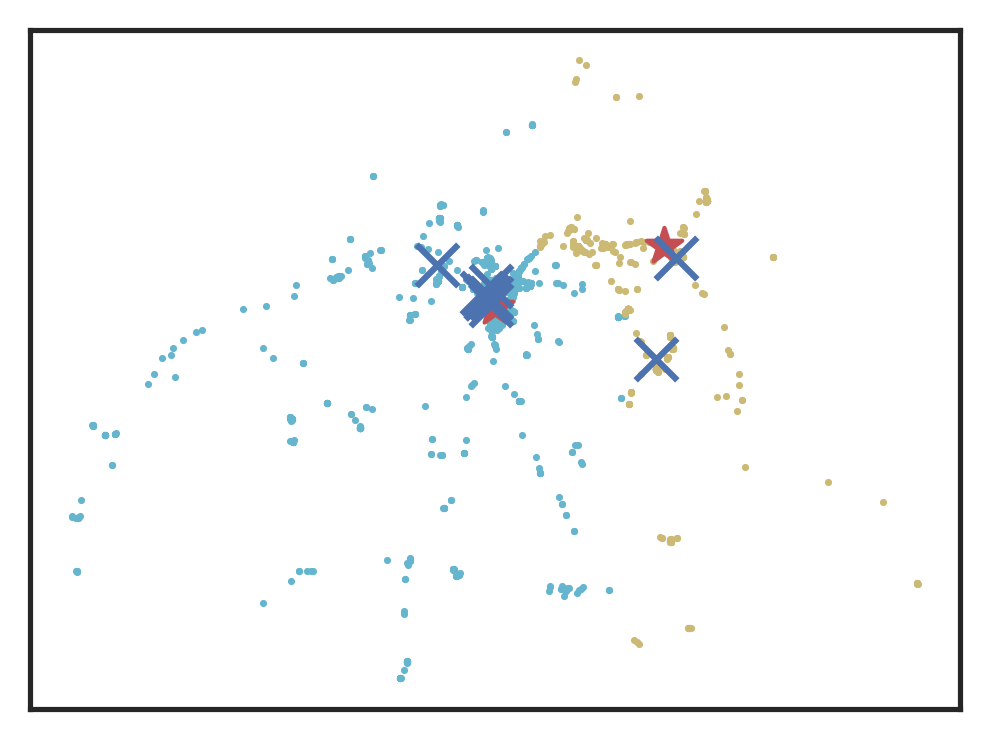

In [61]:
plt.figure(dpi=300,figsize=(4,3))
sns.set(style='white')
ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
#plt.title(r"$ALG_3$++")
plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
# plt.text(0.22,0.95,s=r'$\alpha = 1.64$')
# plt.text(0.54,0.95,s=r'$\beta = 1.27$')
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_algmedians.png",dpi=300)

In [56]:
K=10
meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)

1.6511473229132025 1.6676351286115207 7.498230013852434


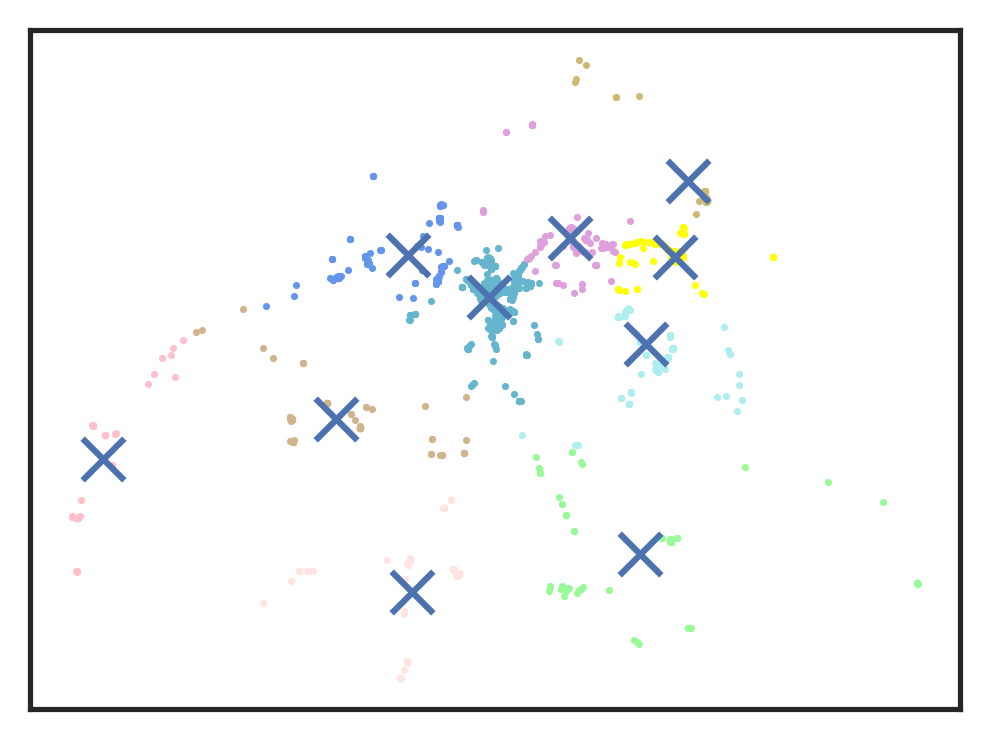

In [63]:
plt.figure(dpi=300,figsize=(4,3))
sns.set(style='white')
view_meansormedians(gaussian_data, meansplus, groups_meansplus)
#plt.title(r"$k$-means++")
plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
#plt.margins(0,0)
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_means.png",dpi=300)

In [57]:
K=10
Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)

1.4898570003325573 1.4459081666579219 10.604522058923502


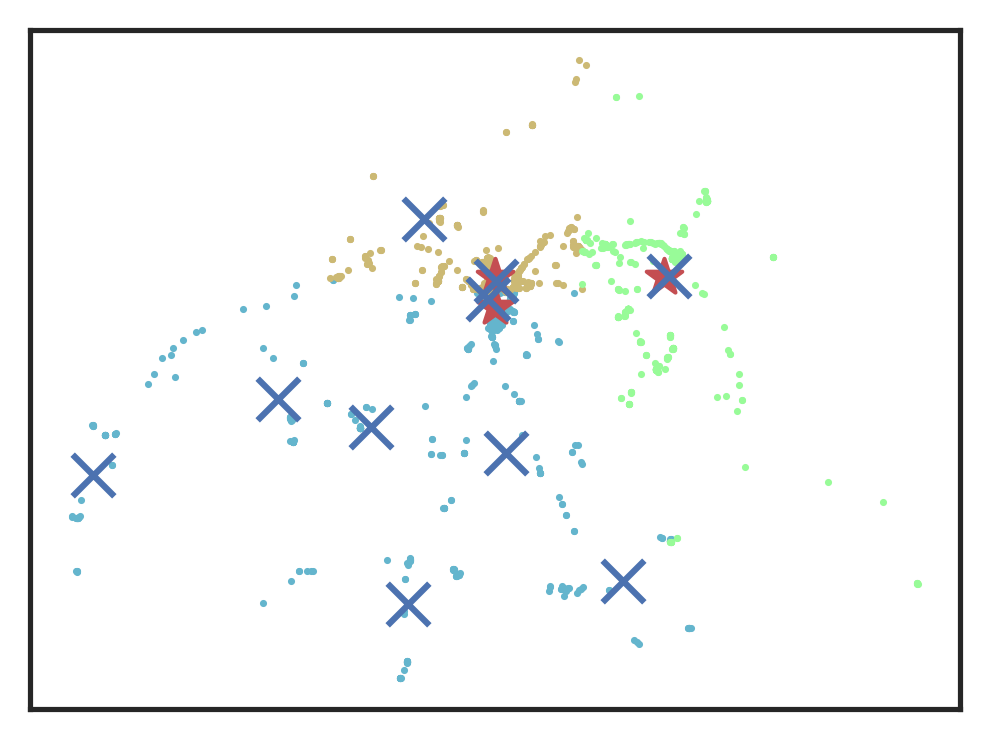

In [64]:
plt.figure(dpi=300,figsize=(4,3))
sns.set(style='white')
ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
#plt.title(r"$ALG_3$++")
plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_algmeans.png",dpi=300)

In [40]:
medians

array([[0.49469011, 0.63430213],
       [0.64014879, 0.69522898],
       [0.49485418, 0.61597255],
       [0.48948434, 0.61514509],
       [0.71520022, 0.6802218 ],
       [0.39583097, 0.26178167],
       [0.49581645, 0.60624131],
       [0.49019265, 0.61930292]])

In [36]:
for K in range(8,18):
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)
#         view_meansormedians(gaussian_data, meansplus, groups_meansplus)
#         plt.title("kmeansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/kmeansplus_g3_4 K={}".format(K))
#         plt.clf()# renew to prevent overlap


    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
#         ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
#         plt.title("ALG3_meansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/ALG3_meansplus_g3_4 K={}".format(K))
#         plt.clf()
    

0.5826405054871966 0.7960056043719348 161.53093094598597
0.5693382108413702 0.7844074893060916 162.40622823697075
0.7901563019620884 0.9407799532471323 230.1241445777613
0.689890256069172 0.7735601123649958 185.76006223378766
0.6983704689058863 0.862229134860308 171.93516273644423
0.7748586631193881 0.8611304507273352 183.39000020718618
0.8011306950448952 0.9234454429216858 160.03711289481083
0.6822414366478218 0.8353482904166425 176.01049747625444
0.48885932823412037 0.7407273180406759 148.61419982835483
0.6045892916528101 0.839740707679583 166.88969610154578
0.5598603259062188 0.7725945883970152 149.58550384531
0.6917193215829731 0.8286431283610761 147.8114998400892
0.6960425673428666 0.8582532955853643 139.86340010341664
0.9451280345859661 0.9579462595273404 160.0631557061895
0.7432657133355504 0.8014896122377568 134.62922549594717
0.7781842367808447 0.8818952590797848 135.11526091893114
0.6890588626538078 0.8028914105549988 147.06558519218328
0.8726305287662122 0.940167531297469 14

In [41]:
for K in range(8,18):
    medians, groups_medians = kmedians(gaussian_data, K)
    max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
    max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
    totaldist_medians = totaldist(gaussian_data, medians, False)
    print(max_alpha_medians, max_beta_medians, totaldist_medians)
    view_meansormedians(gaussian_data, medians, groups_medians)
    plt.title("kmedians K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_medians/kmedians K={}".format(K))
    plt.clf()# renew to prevent overlap


    Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
    max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
    max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
    totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
    print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
    ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
    plt.title("ALG3_medians K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_meidans K={}".format(K))
    plt.clf()
    

0.5759893581642833 0.8026385765362091 195.64868398628397
0.6371799135350849 0.8209230811012893 197.01899260955798
0.6584635849684071 0.819568672140544 172.18497978078432
0.6854007316262055 0.786899857862821 186.63328915397392
0.44895244429664116 0.7103611637084486 155.90724063343234
0.8413701363485201 0.9632175414744689 222.51125703849178
0.7919853674758895 0.8977426788907199 192.9291263705955
0.6730961090788161 0.8425226397080828 185.16023279059303
0.5986032590621883 0.7801988397992392 152.3196047676378
0.6305287662121716 0.8590818819965816 138.11584879828388
0.9294978383771201 0.9252612922224606 185.27928207895062
0.6701030927835051 0.7694412842950035 138.40460800593632
0.6029265048220818 0.8361214311487807 150.90173442799338
0.779847023611573 0.9408666326777653 148.32929487667602
0.8604921849018956 0.9512043331529649 138.85312520999338
0.8056202194878617 0.8985064833475905 131.7476274920819
0.8433654805453941 0.8868004671612113 158.7823273761984
0.8034585966079149 0.8882479832890416

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>